In [155]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
import re
import string
from nltk.tokenize import word_tokenize
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.simplefilter(action='ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MS6283\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MS6283\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\MS6283\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\MS6283\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [67]:
import pandas as pd
df0 = pd.read_csv("Tweets.csv")

In [68]:
df0.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [69]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [70]:
def remp_mention(texte):  # Remplacer les mentions @XXX par ' user '
    resultat = re.sub(r"^@\S+|\s@\S+", ' user ', texte)
    return resultat

In [71]:
df1 = df0.copy()
df1['text'] = df1['text'].apply(remp_mention)
df1.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,user What user said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,user plus you've added commercials to the ex...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,user I didn't today... Must mean I need to t...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,user it's really aggressive to blast obnoxio...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,user and it's a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [72]:
def remp_hashtag(texte):  # Remplacer les #XXX par ' hashtags 
    resultat = re.sub(r"^#\S+|\s#\S+", ' hashtag ', texte)
    return resultat

In [73]:
df2 = df1.copy()
df2['text'] = df2['text'].apply(remp_hashtag)
df2.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,user What user said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,user plus you've added commercials to the ex...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,user I didn't today... Must mean I need to t...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,user it's really aggressive to blast obnoxio...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,user and it's a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [74]:
def remp_link(texte):  # supprimer les liens
    resultat = re.sub(r'https?:\S+|http?:\S', ' link ', texte)
    return resultat

In [75]:
df3 = df2.copy()
df3['text'] = df3['text'].apply(remp_link)
df3.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,user What user said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,user plus you've added commercials to the ex...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,user I didn't today... Must mean I need to t...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,user it's really aggressive to blast obnoxio...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,user and it's a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [76]:
def remp_emoticon(texte):  # Remplacer les emoticones par leur signification
    # mettre \ devant : ) ^
    # pas de \ devant : ; : - ] >
    resultat = re.sub(
        ';p|;P|:p|:P|xp|xP|=p|=P|:‑P|X‑P|x‑p|:‑p|:‑Þ|:‑þ|:‑b|>:P|d:|:b|:þ|:Þ',
        ' emoticon_langue ', texte)
    resultat = re.sub(':"D', 'emoticon_joyeux', resultat)
    resultat = re.sub(
        ":‑\)|:\)|:-]|:]|:->|:>|8-\)|8\)|:-}|:}|:o\)|:c\)|:\^\)|=]|=\)|:-\)\)|:'‑\)|:'\)",
        ' emoticon_joyeux ', resultat)
    resultat = re.sub(':‑D|:D|8‑D|8D|=D|=3|B\^D|c:|C:|x‑D|xD|X‑D|XD',
                      ' emoticon_rire ', resultat)
    resultat = re.sub(
        ":‑\(|:\(|:‑c|:c|:‑<|:<|:‑\[|:\[|>:\[|:{|:@|:\(|;\(|:'‑\(|:'\(|:=\(|v.v",
        ' emoticon_triste ', resultat)
    resultat = re.sub("D‑':|D:<|D:|D8|D;|D=|DX", ' emoticon_degout ', resultat)
    resultat = re.sub(
        ":‑O|:O|:‑o|:o|:-0|8‑0|>:O|=O|=o|=0|O_O|o_o|O-O|o‑o|O_o|o_O",
        ' emoticon_surprise ', resultat)
    resultat = re.sub(":-3|:3|=3|x3|X3|>:3", ' emoticon_chat ', resultat)
    resultat = re.sub(":-\*|:\*|:×|<3", ' emoticon_amour ', resultat)
    resultat = re.sub(";‑\)|;\)|\*-\)|\*\)|;‑]|;]|;\^\)|;>|:‑,|;D|;3|:‑J",
                      ' emoticon_clindoeil ', resultat)
    resultat = re.sub(":-/ |>.<|>_<|:/|:‑.|>:\|>:/|:\|=/|=\|:L|=L|:S",
                      ' emoticon_sceptique ', resultat)
    resultat = re.sub(
        "<_<|>_>|<.<|>.>|:$|://|://3|:‑X|:X|:‑#|:#|:‑&|:&|%‑\)|%\)",
        ' emoticon_embarrasse ', resultat)
    resultat = re.sub("8-X|8=X|x-3|x=3|X_X|x_x", ' emoticon_mort ', resultat)
    
    return resultat

In [77]:
df4 = df3.copy()
df4['text'] = df4['text'].apply(remp_emoticon)
df4.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,user What user said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,user plus you've added commercials to the e ...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,user I didn't today... Must mean I need to t...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,user it's really aggressive to blast obnoxio...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,user and it's a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [78]:
def remove_Punctuation(tokens):
    return [t for t in tokens if t not in string.punctuation]

In [79]:
df5 = df4.copy()
df5['text'] = df5['text'].apply(lambda x: ' '.join(remove_Punctuation(x.split())))
df5.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,user What user said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,user plus you've added commercials to the e em...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,user I didn't today... Must mean I need to tak...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,user it's really aggressive to blast obnoxious...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,user and it's a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [80]:
def remp_abreviation(phrase):  # Remplacer les abréviations
    # specific
    phrase = phrase.lower()
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"cannot", "can not", phrase)
    phrase = re.sub(r"didnt", "did not", phrase)
    phrase = re.sub(r"couldnt", "could not", phrase)
    phrase = re.sub(r"doesnt", "does not", phrase)
    phrase = re.sub(r"dont", "do not", phrase)
    phrase = re.sub(r"hasnt", "has not", phrase)
    phrase = re.sub(r"hadnt", "had not", phrase)
    phrase = re.sub(r"havent", "have not", phrase)
    phrase = re.sub(r"ive", "i have", phrase)
    phrase = re.sub(r"im", "i am", phrase)
    phrase = re.sub(r"wasnt", "was not", phrase)
    phrase = re.sub(r"werent", "were not", phrase)
    phrase = re.sub(r"'cause", "because", phrase)
    phrase = re.sub(r"cos", "because", phrase)
    phrase = re.sub(r"f\*\*k", "fuck", phrase)
    phrase = re.sub(r"f\*\*king", "fucking", phrase)
    phrase = re.sub(r"idk", "i do not know", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"n\'", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    phrase = re.sub(r" u ", " you ", phrase)
    phrase = re.sub(r" ur ", " your ", phrase)
    phrase = re.sub(r" n ", " and ", phrase)

    return phrase

In [81]:
df6 = df5.copy()
df6['text'] = df6['text'].apply(remp_abreviation)
df6.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,user what user said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,user plus you have added commercials to the e ...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,user i did not today... must mean i need to ta...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,user it is really aggressi have to blast obnox...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,user and it is a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [82]:
def remove_stopwords(tokens):
    stopwords = nltk.corpus.stopwords.words("english") 
    return [token for token in tokens if token not in stopwords]

In [83]:
df7 = df6.copy()
df7['text'] = df7['text'].apply(lambda x: ' '.join(remove_stopwords(x.split())))
df7.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,user user said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,user plus added commercials e emoticon_langue ...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,user today... must mean need take another trip!,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"user really aggressi blast obnoxious ""entertai...",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,user really big bad thing,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [84]:
def clean_text(df):
    for row in range(len(df)):
        df.loc[row, 'text'] = df.loc[row, 'text'].lower()
        df.loc[row, 'text'] = re.sub(r'\W|_', ' ', df.loc[row, 'text'])
        df.loc[row, 'text'] = re.sub(r'[0-9]', '', df.loc[row, 'text'])
        df.loc[row, 'text'] = re.sub(r'\s+', ' ', df.loc[row, 'text'])
        df.loc[row, 'text'] = re.sub(r'^\s|\s$', '', df.loc[row, 'text'])
        df.loc[row, 'text'] = re.sub(r'\s+[a-zA-Z]\s+', ' ', df.loc[row, 'text'])
        df.loc[row, 'text'] = re.sub(r'\^[a-zA-Z]\s+', ' ', df.loc[row, 'text'])
        df.loc[row, 'text'] = re.sub(r'^b\s+', ' ', df.loc[row, 'text'])
    return df

In [85]:
df8 = df7.copy()
df8 = clean_text(df8)
df8.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,user user said,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,user plus added commercials emoticon langue er...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,user today must mean need take another trip,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,user really aggressi blast obnoxious entertain...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,user really big bad thing,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [90]:
def tokenize(text):
    """La tokenization, qui désigne le découpage en mots des différents documents qui constituent votre corpus"""
    tokens= word_tokenize(text)
    return tokens

In [93]:
df9 = df8.copy()
df9['text'] = df9['text'].apply(tokenize)
df9.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,"[user, user, said]",NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,"[user, plus, added, commercials, emoticon, lan...",NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,"[user, today, must, mean, need, take, another,...",NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"[user, really, aggressi, blast, obnoxious, ent...",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,"[user, really, big, bad, thing]",NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [94]:
def stem(tokens):
    ps = nltk.PorterStemmer()
    return [ps.stem(token) for token in tokens]

In [96]:
df10 = df9.copy()
df10['text'] = df10['text'].apply(stem)
df10.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,"[user, user, said]",NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,"[user, plu, ad, commerci, emoticon, langu, eri...",NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,"[user, today, must, mean, need, take, anoth, t...",NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"[user, realli, aggressi, blast, obnoxi, entert...",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,"[user, realli, big, bad, thing]",NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [104]:
def lemmatize(tokens):
    wn = nltk.WordNetLemmatizer()
    return [wn.lemmatize(token) for token in tokens]

In [105]:
df11 = df10.copy()
df11['text'] = df11['text'].apply(lemmatize)
df11.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,"[user, user, said]",NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,"[user, plu, ad, commerci, emoticon, langu, eri...",NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,"[user, today, must, mean, need, take, anoth, t...",NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"[user, realli, aggressi, blast, obnoxi, entert...",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,"[user, realli, big, bad, thing]",NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [110]:
def text_vectorization(data, col, size):
    #data=input data, col=colonne text, size=nombre de mots à considerer
    tfidf_vect = TfidfVectorizer(analyzer='word', max_features=size)
    X = tfidf_vect.fit_transform(data[col].apply(lambda x: ' '.join(x)))
    data_text = pd.DataFrame(X.toarray())
    data_text.columns = tfidf_vect.get_feature_names()  
    data = pd.concat([data, data_text], axis=1)
    data = data.drop(columns=[col])
    return data

In [114]:
df12= df11.copy()
dt1= text_vectorization(df12, "text", size=200)
dt1= dt1.drop(['tweet_id', 'airline_sentiment_confidence', 'negativereason', 'negativereason_confidence', 'airline', 'airline_sentiment_gold', 'name', 'negativereason_gold', 'retweet_count', 'tweet_coord', 'tweet_created', 'tweet_location', 'user_timezone'], axis = 1)
dt1.head()

,airline_sentiment,aa,again,agent,air,airlin,airport,alreadi,am,ame,...,websit,week,well,work,worst,would,ye,year,yet,you
0,neutral,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,positive,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,neutral,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,negative,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,negative,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [115]:
dt1.describe()

,aa,again,agent,air,airlin,airport,alreadi,am,ame,amp,...,websit,week,well,work,worst,would,ye,year,yet,you
count,14640.000000,14640.000000,14640.000000,14640.000000,14640.000000,14640.000000,14640.000000,14640.000000,14640.000000,14640.000000,...,14640.000000,14640.000000,14640.000000,14640.000000,14640.000000,14640.000000,14640.000000,14640.000000,14640.000000,14640.000000
mean,0.008000,0.006512,0.011256,0.005014,0.015752,0.010768,0.006008,0.005907,0.022785,0.015637,...,0.005399,0.006156,0.005753,0.012298,0.007028,0.019047,0.008725,0.005177,0.004977,0.017673
std,0.063260,0.055125,0.068765,0.052838,0.084667,0.069823,0.056430,0.053409,0.088994,0.078294,...,0.054063,0.055214,0.056054,0.076626,0.058221,0.087676,0.072178,0.054154,0.050347,0.097279
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.980601,0.981675,0.835508,0.984212,0.993128,0.977429,0.982831,0.982458,0.964602,0.971734,...,0.983649,0.982391,0.983358,0.976457,0.981237,0.969348,0.980992,0.984136,0.983796,0.973574


In [120]:
X = dt1.drop(['airline_sentiment'], axis=1)
pca = PCA()
X_pca = pca.fit_transform(X)
explained_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(explained_variance >= 0.95) + 1

#Refaire avec la méthode kaiser (prendre 1/n)

print("Nombre optimal de dimensions :", n_components)

Nombre optimal de dimensions : 175


In [1]:
25/200

0.125

In [123]:
dt2= df11.copy()
dt2= text_vectorization(dt2, "text", size=175)
dt2= dt2.drop(['tweet_id', 'airline_sentiment_confidence', 'negativereason', 'negativereason_confidence', 'airline', 'airline_sentiment_gold', 'name', 'negativereason_gold', 'retweet_count', 'tweet_coord', 'tweet_created', 'tweet_location', 'user_timezone'], axis = 1)
dt2.head()

,airline_sentiment,aa,again,agent,airlin,airport,alreadi,am,ame,amp,...,weather,websit,week,well,work,worst,would,ye,yet,you
0,neutral,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,positive,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,neutral,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,negative,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.640758,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,negative,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [136]:
dt2.airline_sentiment.value_counts(normalize=True)*100

negative    62.691257
neutral     21.168033
positive    16.140710
Name: airline_sentiment, dtype: float64

In [139]:
def encodage_target_binary(data,col):
    data[col] = data[col].apply(lambda x: 1 if x == "negative" else 0)
    return data

In [140]:
dt3 = encodage_target_binary(dt2, 'airline_sentiment')
dt3.head()

,airline_sentiment,aa,again,agent,airlin,airport,alreadi,am,ame,amp,...,weather,websit,week,well,work,worst,would,ye,yet,you
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.640758,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [173]:
dt3[2:]

,airline_sentiment,aa,again,agent,airlin,airport,alreadi,am,ame,amp,...,websit,week,well,work,worst,would,ye,yet,you,cluster
2,0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,1
3,1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.640758,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0
4,1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0
5,1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.336838,0.000000,0.0,0.0,0
6,0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.321584,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.444456,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,1
14636,1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0
14637,0,0.0,0.0,0.0,0.635252,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,1
14638,1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0


In [152]:
dt3.dtypes

airline_sentiment      int64
aa                   float64
again                float64
agent                float64
airlin               float64
                      ...   
worst                float64
would                float64
ye                   float64
yet                  float64
you                  float64
Length: 176, dtype: object

In [156]:
def get_silhouette_scores(data, max_k):
    scores = []
    for k in range(2, max_k+1):
        kmeans = KMeans(n_clusters=k, random_state=0).fit(data)
        score = silhouette_score(data, kmeans.labels_)
        scores.append(score)
    return scores

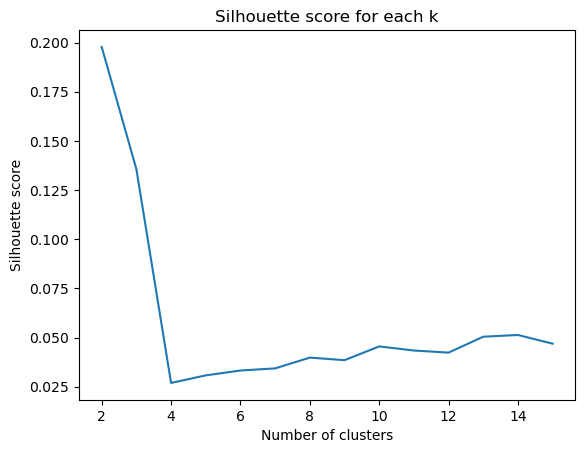

In [157]:
max_k = 15

dt3_array = dt3.values
scores = get_silhouette_scores(dt3_array, max_k)

plt.plot(range(2, max_k+1), scores)
plt.title("Silhouette score for each k")
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")
plt.show()

In [159]:
n_clusters = np.argmax(scores) + 2  # Nombre optimal de clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(dt3_array)
labels = kmeans.labels_

In [168]:
print("Nombre optimal de clusters: ", n_clusters)
print("Labels de clusters: ", labels)

Nombre optimal de clusters:  2
Labels de clusters:  [1 1 1 ... 1 0 1]


In [170]:
dt3['cluster'] = labels

for i in range(n_clusters):
    print(f"\nCluster {i}:")
    cluster_tweets = dt3[dt3['cluster']==i]
    print(cluster_tweets.values)

    cluster_words = dt3.loc[dt3['cluster']==i].drop(columns=['airline_sentiment', 'cluster']).sum().sort_values(ascending=False)
    print(f"\nMost frequent words in cluster {i}:")
    print(cluster_words[:10])



Cluster 0:
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]

Most frequent words in cluster 0:
user       1194.213765
flight      777.788314
hashtag     569.776487
hour        371.630755
get         365.898236
delay       325.405922
cancel      288.019206
custom      284.050398
servic      277.545475
ame         254.863127
dtype: float64

Cluster 1:
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]

Most frequent words in cluster 1:
user        1052.434980
thank        568.279460
hashtag      403.845097
link         383.023558
flight       346.545598
you          183.040149
emoticon     155.765152
get          152.322458
help         132.294273
fli          132.204647
dtype: float64


ValueError: The number of FixedLocator locations (177), usually from a call to set_ticks, does not match the number of ticklabels (175).

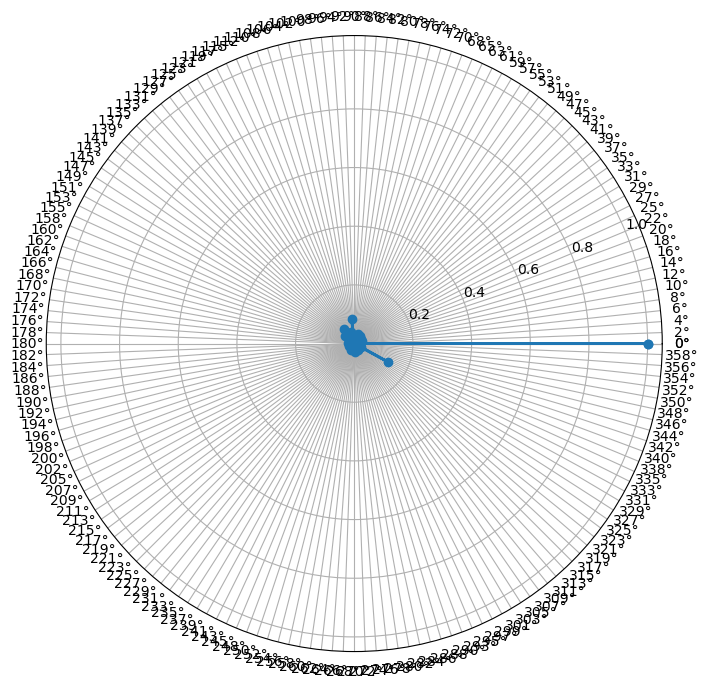

In [172]:
cluster_centers = kmeans.cluster_centers_

feature_names = dt3.columns[:-2]

for cluster_idx in range(n_clusters):
    values = cluster_centers[cluster_idx]

    angles = np.linspace(0, 2*np.pi, len(values), endpoint=False)
    values = np.concatenate((values,[values[0]]))
    angles = np.concatenate((angles,[angles[0]]))

    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111, polar=True)
    ax.plot(angles, values, 'o-', linewidth=2)
    ax.fill(angles, values, alpha=0.25)
    ax.set_thetagrids(angles * 180/np.pi, feature_names)
    ax.grid(True)
    ax.set_title(f"Cluster {cluster_idx}")
    plt.show()
